In [2]:
import datetime
import csv
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from bs4 import BeautifulSoup 
import datetime
import zipfile
import pandas as pd
import matplotlib.pyplot as plt

# Defining Variables Needed For Data Quality Checks

In [3]:
#Current Data Checks for MA

# - Difference in sum of cases by race v. Total confirmed cases (should be equal)

# - Difference in sum of deaths by race v. Total deaths (should be equal)

# - Difference in sum of hopsital by hospital by race versus Total hospital (should be equal)


#Variables needed
# 1) Sum of cases by Race
# 2) Sum of Deaths by Race
# 3) Sum of hospital by Race
# 4) Total Hospital
# 5) Total Cases
# 6) Total Deaths

# Downloading the Public CSV from CRDT

In [5]:
public_csv = pd.read_csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vS8SzaERcKJOD_EzrtCDK1dX1zkoMochlA9iHoHg_RSw3V8bkpfk1mpw4pfL5RdtSOyx_oScsUtyXyk/pub?gid=43720681&single=true&output=csv")

# Defining MA Covid Summary from the Public CSV

In [6]:
MA_covid_summary = public_csv[public_csv['State']== 'MA']
MA_covid_summary

,Date,State,Cases_Total,Cases_White,Cases_Black,Cases_LatinX,Cases_Asian,Cases_AIAN,Cases_NHPI,Cases_Multiracial,...,Tests_LatinX,Tests_Asian,Tests_AIAN,Tests_NHPI,Tests_Multiracial,Tests_Other,Tests_Unknown,Tests_Ethnicity_Hispanic,Tests_Ethnicity_NonHispanic,Tests_Ethnicity_Unknown
21,20201220,MA,323531,101189,20734.0,69879.0,7429.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
77,20201216,MA,304112,88188,18890.0,62098.0,6532.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
133,20201213,MA,290578,88188,18890.0,62098.0,6532.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
189,20201209,MA,269412,75918,17223.0,54567.0,5579.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
245,20201206,MA,256844,75918,17223.0,54567.0,5579.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3829,20200426,MA,54938,11646,3735.0,5933.0,769.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3885,20200422,MA,42944,9232,3006.0,4595.0,601.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3941,20200419,MA,38077,7640,2524.0,3818.0,538.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3997,20200415,MA,29918,5437,1749.0,2537.0,397.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Finding Columns with NaN Values

In [7]:
#Decided not drop Columns with NaN values because feel that the knowledge that the data is missing is pertentient

nan_values = MA_covid_summary.isna()
nan_columns = nan_values.any()

columns_with_nan = MA_covid_summary.columns[nan_columns].tolist()
print(columns_with_nan)

#Seems that MA has just started reporting hospital data with ethnicity, race and unknown

['Cases_AIAN', 'Cases_NHPI', 'Cases_Multiracial', 'Deaths_AIAN', 'Deaths_NHPI', 'Deaths_Multiracial', 'Hosp_Total', 'Hosp_White', 'Hosp_Black', 'Hosp_LatinX', 'Hosp_Asian', 'Hosp_AIAN', 'Hosp_NHPI', 'Hosp_Multiracial', 'Hosp_Other', 'Hosp_Unknown', 'Hosp_Ethnicity_Hispanic', 'Hosp_Ethnicity_NonHispanic', 'Hosp_Ethnicity_Unknown', 'Tests_Total', 'Tests_White', 'Tests_Black', 'Tests_LatinX', 'Tests_Asian', 'Tests_AIAN', 'Tests_NHPI', 'Tests_Multiracial', 'Tests_Other', 'Tests_Unknown', 'Tests_Ethnicity_Hispanic', 'Tests_Ethnicity_NonHispanic', 'Tests_Ethnicity_Unknown']


## Creating Total Cases,  Total Cases by Race and Total Cases by Ethnicity variables

In [9]:
#Most recent Total Cases Reported in Maine
total_cases = MA_covid_summary['Cases_Total'].iloc[0:1]

#Have to convert into a float in order to perform operations on total
total_cases = total_cases.astype(float)

print("Total Cases in Massachusetts as of Today")
print(total_cases)


#Need to find case totals for each race (including other and unknown)

cases_white = MA_covid_summary['Cases_White'].iloc[0:1]
cases_white = cases_white.astype(float)


cases_latinx = MA_covid_summary['Cases_LatinX'].iloc[0:1]
cases_latinx = cases_latinx.astype(float)

cases_asian = MA_covid_summary['Cases_Asian'].iloc[0:1]
cases_asian = cases_asian.astype(float)

cases_other = MA_covid_summary['Cases_Other'].iloc[0:1]
cases_other = cases_other.astype(float)

cases_black = MA_covid_summary['Cases_Black'].iloc[0:1]
cases_black = cases_black.astype(float)

cases_unknown = MA_covid_summary['Cases_Unknown'].iloc[0:1]
cases_unknown = cases_unknown.astype(float)


total_cases_race = cases_white + cases_black + cases_latinx + cases_asian + cases_other + cases_unknown
print("Total Cases with Race in Massachusetts")
print(total_cases_race)

#Need to find case totals for each ethnicity (including other and unknown)

cases_ethnicity_hispanic = MA_covid_summary['Cases_Ethnicity_Hispanic'].iloc[0:1]
cases_ethnicity_hispanic = cases_ethnicity_hispanic.astype(float)

cases_ethnicity_nonhispanic = MA_covid_summary['Cases_Ethnicity_NonHispanic'].iloc[0:1]
cases_ethnicity_nonhispanic = cases_ethnicity_nonhispanic.astype(float)

cases_ethnicity_unknown = MA_covid_summary['Cases_Ethnicity_Unknown'].iloc[0:1]
cases_ethnicity_unknown = cases_ethnicity_unknown.astype(float)

total_cases_ethnicity = cases_ethnicity_hispanic + cases_ethnicity_nonhispanic + cases_ethnicity_unknown
print("Total Cases with Ehtnicity in Massachusetts")
print(total_cases_ethnicity)

Total Cases in Massachusetts as of Today
21    323531.0
Name: Cases_Total, dtype: float64
Total Cases with Race in Massachusetts
21    323531.0
dtype: float64
Total Cases with Ehtnicity in Massachusetts
21    323531.0
dtype: float64


## Creating Total Deaths,  Total Deaths by Race and Total Deaths by Ethnicity variables

In [10]:
#Most recent Total Cases Reported in Maine
total_deaths = MA_covid_summary['Deaths_Total'].iloc[0:1]

#Have to convert into a float in order to perform operations on total
total_deaths = total_deaths.astype(float)

#Printing out Total Deaths
print("Total Deaths in Massachusetts as of Today")
print(total_deaths)


#Need to find death totals for each race (including other and unknown)

deaths_white = MA_covid_summary['Deaths_White'].iloc[0:1]
deaths_white = deaths_white.astype(float)

deaths_black = MA_covid_summary['Deaths_Black'].iloc[0:1]
deaths_black = deaths_black.astype(float)

deaths_latinx = MA_covid_summary['Deaths_LatinX'].iloc[0:1]
deaths_latinx = deaths_latinx.astype(float)

deaths_asian = MA_covid_summary['Deaths_Asian'].iloc[0:1]
deaths_asian = deaths_asian.astype(float)

deaths_other = MA_covid_summary['Deaths_Other'].iloc[0:1]
deaths_other = deaths_other.astype(float)

deaths_unknown = MA_covid_summary['Deaths_Unknown'].iloc[0:1]
deaths_unknown = deaths_unknown.astype(float)


total_deaths_race = deaths_white + deaths_black + deaths_latinx + deaths_asian + deaths_other + deaths_unknown

print("Total Deaths with Race in Massachusetts")
print(total_deaths_race)


#Need to find death totals for each ethnicity (including other and unknown)

deaths_ethnicity_hispanic = MA_covid_summary['Deaths_Ethnicity_Hispanic'].iloc[0:1]
deaths_ethnicity_hispanic = deaths_ethnicity_hispanic.astype(float)

deaths_ethnicity_nonhispanic = MA_covid_summary['Deaths_Ethnicity_NonHispanic'].iloc[0:1]
deaths_ethnicity_nonhispanic = deaths_ethnicity_nonhispanic.astype(float)

deaths_ethnicity_unknown = MA_covid_summary['Deaths_Ethnicity_Unknown'].iloc[0:1]
deaths_ethnicity_unknown = deaths_ethnicity_unknown.astype(float)

total_deaths_ethnicity = deaths_ethnicity_hispanic + deaths_ethnicity_nonhispanic + deaths_ethnicity_unknown

print("Total Deaths with Ethnicity in Massachusetts")
print(total_deaths_ethnicity)

Total Deaths in Massachusetts as of Today
21    11717.0
Name: Deaths_Total, dtype: float64
Total Deaths with Race in Massachusetts
21    11717.0
dtype: float64
Total Deaths with Ethnicity in Massachusetts
21    11717.0
dtype: float64


## Creating Total Hospitalizations,  Total Hospitalizations by Race and Total Hospitalizations by Ethnicity variables

In [11]:
#Most recent Total Cases Reported in Maine
total_hosp = MA_covid_summary['Hosp_Total'].iloc[0:1]

#Have to convert into a float in order to perform operations on total
#total_hosp = total_hosp.astype(float)

#Printing out Total Hospitalizations
print("Total Hospitalizations in Massachusetts as of Today")
print(total_hosp)


#Need to find Hospitalizations totals for each race (including other and unknown)

hosp_white = MA_covid_summary['Hosp_White'].iloc[0:1]
hosp_white = hosp_white.astype(float)

hosp_black = MA_covid_summary['Hosp_Black'].iloc[0:1]
hosp_black = hosp_black.astype(float)

hosp_latinx = MA_covid_summary['Hosp_LatinX'].iloc[0:1]
hosp_latinx = hosp_latinx.astype(float)

hosp_asian = MA_covid_summary['Hosp_Asian'].iloc[0:1]
hosp_asian = hosp_asian.astype(float)

hosp_other = MA_covid_summary['Hosp_Other'].iloc[0:1]
hosp_other = hosp_other.astype(float)

hosp_unknown = MA_covid_summary['Hosp_Unknown'].iloc[0:1]
hosp_unknown = hosp_unknown.astype(float)


total_hosp_race = hosp_white + hosp_black + hosp_latinx + hosp_asian + hosp_other + hosp_unknown

print("Total Hospitalizations with Race in Massachusetts")
print(total_hosp_race)


#Need to find Hospitalizations totals for each ethnicity (including other and unknown)

hosp_ethnicity_hispanic = MA_covid_summary['Hosp_Ethnicity_Hispanic'].iloc[0:1]
hosp_ethnicity_hispanic = hosp_ethnicity_hispanic.astype(float)

hosp_ethnicity_nonhispanic = MA_covid_summary['Hosp_Ethnicity_NonHispanic'].iloc[0:1]
hosp_ethnicity_nonhispanic = hosp_ethnicity_nonhispanic.astype(float)

hosp_ethnicity_unknown = MA_covid_summary['Hosp_Ethnicity_Unknown'].iloc[0:1]
hosp_ethnicity_unknown = hosp_ethnicity_unknown.astype(float)

total_hosp_ethnicity = hosp_ethnicity_hispanic + hosp_ethnicity_nonhispanic + hosp_ethnicity_unknown

print("Total Hospitalizations with Ethnicity in Massachusetts")
print(total_hosp_ethnicity)

Total Hospitalizations in Massachusetts as of Today
21    15372.0
Name: Hosp_Total, dtype: float64
Total Hospitalizations with Race in Massachusetts
21    15372.0
dtype: float64
Total Hospitalizations with Ethnicity in Massachusetts
21    15372.0
dtype: float64


# Data Quality Checking Clause

In [12]:
#Checking if Total Cases and Cases with Race are equal.
#If not equal will print an error statment.
if ((total_cases - total_cases_race) != 0).bool():
    print("Data Quality Check Needed for Cases with Race.")

    
#Checking if Total Cases and Cases with Ethnicity are equal.  
#If not equal will print an error statment.   
if ((total_cases - total_cases_ethnicity) != 0).bool():
    print("Data Quality Check Needed for Cases with Ethnicity.")
    
#Checking if Total Deaths and Deaths with Race are equal.
#If not equal will print an error statment.
if ((total_deaths - total_deaths_race) != 0).bool():
    print("Data Quality Check Needed for Deaths with Race.")
    
#Checking if Total Deaths and Deaths with Ethnicity are equal.
#If not equal will print an error statment.
if ((total_deaths - total_deaths_ethnicity) != 0).bool():
    print("Data Quality Check Needed for Deaths with Ethnicity.")
    
#Checking if Total Hospitalizations and Hospitalizations with Race are equal.
#If not equal will print an error statment.
if ((total_hosp - total_hosp_race) != 0).bool():
    print("Data Quality Check Needed for Hospitalizations with Race.")

    
#Checking if Total Hospitalizations and Hospitalizations with Ethnicity are equal.  
#If not equal will print an error statment.   
if ((total_hosp - total_hosp_ethnicity) != 0).bool():
    print("Data Quality Check Needed for Hospitalizations with Ethnicity.")
    
    

# Creating a Case Each Day Column to use in Time Series Plots

In [13]:
#In order to find Total Cases Each Day need to subtract next row from previous row
#However first need to convert column type to float
MA_covid_summary['Cases_Total'] = MA_covid_summary['Cases_Total'].astype(float)
cases_each_day = MA_covid_summary['Cases_Total'].diff(periods=-1)

#Adding Cases Each Day as a column
MA_covid_summary['Cases Each Day'] = cases_each_day

#Maybe change cases each day to cases each week

<ipython-input-13-90b3d464feab>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  MA_covid_summary['Cases_Total'] = MA_covid_summary['Cases_Total'].astype(float)
<ipython-input-13-90b3d464feab>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  MA_covid_summary['Cases Each Day'] = cases_each_day


# Creating a Date Time Column to use In Time Series Plot

In [14]:
#Structuring the Date to be in YYYY/MM/DD format
date_strings = []

for dates in MA_covid_summary['Date'].astype(str):
    date_formatted = dates[0:4] + "/" + dates[4:6] + "/" + dates[6:8]
    date_strings.append(date_formatted)
    
MA_covid_summary["Date Time"] = date_strings

MA_covid_summary['Date Time'] =  pd.to_datetime(MA_covid_summary['Date Time'], format='%Y/%m/%d')  

<ipython-input-14-9a23d22c2f67>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  MA_covid_summary["Date Time"] = date_strings
<ipython-input-14-9a23d22c2f67>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  MA_covid_summary['Date Time'] =  pd.to_datetime(MA_covid_summary['Date Time'], format='%Y/%m/%d')


# Creating a Deaths Each Day Column to use in Time Series Plots

In [19]:
#Apply the same method
MA_covid_summary['Deaths_Total'] = MA_covid_summary['Deaths_Total'].astype(float)
deaths_each_day = MA_covid_summary['Deaths_Total'].diff(periods=-1)


#Adding Cases Each Day as a column
MA_covid_summary['Deaths Each Day'] = deaths_each_day

<ipython-input-19-636c878b7db4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  MA_covid_summary['Hosp_Total'] = MA_covid_summary['Hosp_Total'].astype(float)
<ipython-input-19-636c878b7db4>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  MA_covid_summary['Hosp Each Day'] = hosp_each_day


# Creating a Hospitalizations Each Day Column to use in Time Series Plots

In [20]:
#Apply the same method
MA_covid_summary['Hosp_Total'] = MA_covid_summary['Hosp_Total'].astype(float)
hosp_each_day = MA_covid_summary['Hosp_Total'].diff(periods=-1)


#Adding Cases Each Day as a column
MA_covid_summary['Hosp Each Day'] = hosp_each_day

<ipython-input-20-636c878b7db4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  MA_covid_summary['Hosp_Total'] = MA_covid_summary['Hosp_Total'].astype(float)
<ipython-input-20-636c878b7db4>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  MA_covid_summary['Hosp Each Day'] = hosp_each_day


# Time Series Plots

<AxesSubplot:title={'center':'Cases Each Day: Massachusetts'}, xlabel='Date Time'>

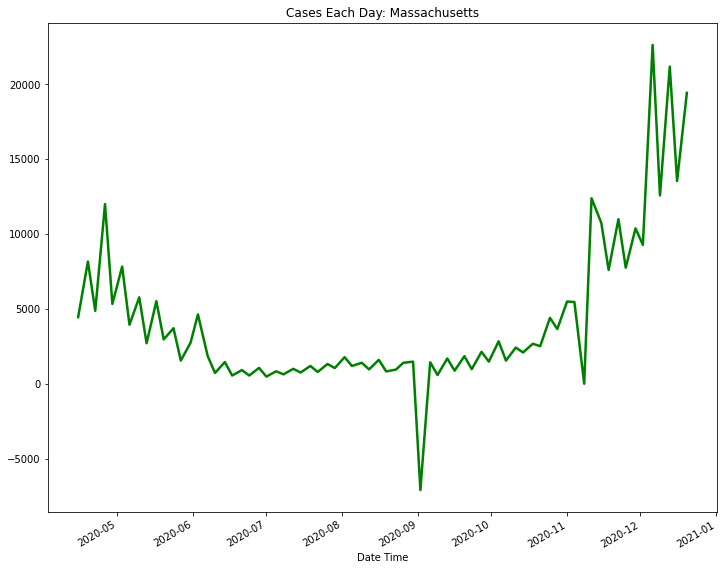

In [16]:
MA_covid_summary.set_index('Date Time')['Cases Each Day'].plot(figsize=(12, 10), title='Cases Each Day: Massachusetts'
                                                                        ,linewidth=2.5, color='green')



<AxesSubplot:title={'center':'Deaths Each Day: Massachusetts'}, xlabel='Date Time'>

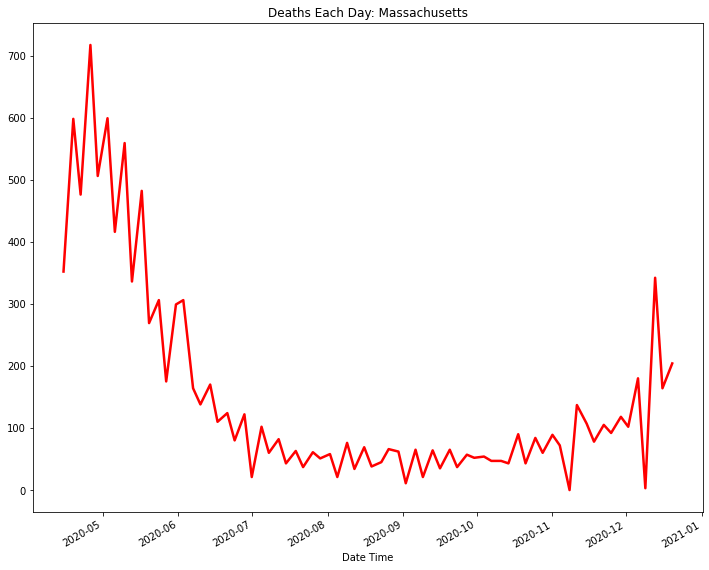

In [17]:
MA_covid_summary.set_index('Date Time')['Deaths Each Day'].plot(figsize=(12, 10), title='Deaths Each Day: Massachusetts'
                                                                        ,linewidth=2.5, color='red')




<AxesSubplot:title={'center':'Hospitalizations Each Day: Massachusetts'}, xlabel='Date Time'>

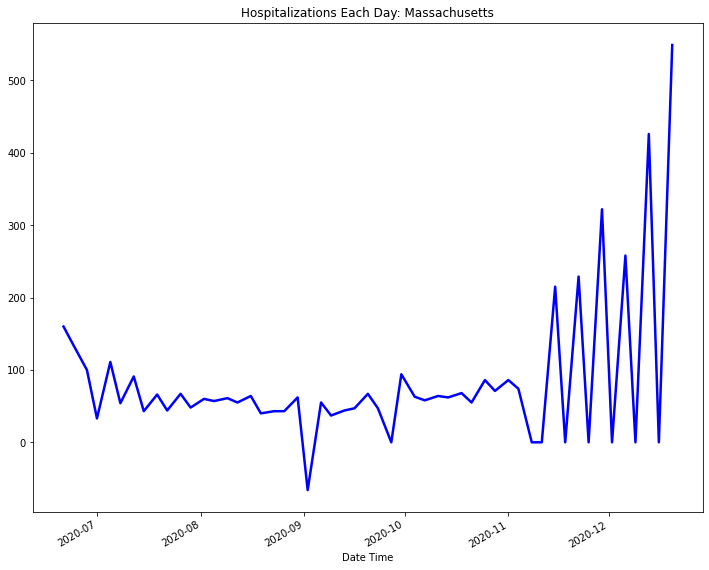

In [22]:
MA_covid_summary.set_index('Date Time')['Hosp Each Day'].plot(figsize=(12, 10), title='Hospitalizations Each Day: Massachusetts'
                                                                        ,linewidth=2.5, color='blue')

